## Practical Work 1

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
#plt.style.use('seaborn-whitegrid')
import numpy as np

#### Read RegData csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [2]:
#regData = pd.read_csv('myfile.csv', sep=',',header=None)
regData = np.genfromtxt('RegData.csv', delimiter=',')



#### Explore your data

In [3]:
print(regData)


[[2.9000001  4.        ]
 [6.69999981 7.4000001 ]
 [4.9000001  5.        ]
 [7.9000001  7.19999981]
 [9.80000019 7.9000001 ]
 [6.9000001  6.0999999 ]
 [6.0999999  6.        ]
 [6.19999981 5.80000019]
 [6.         5.19999981]
 [5.0999999  4.19999981]
 [4.69999981 4.        ]
 [4.4000001  4.4000001 ]
 [5.80000019 5.19999981]]


#### Define variables X and y. Assign first column data to X and second column to y
<b>Note:</b> X is the independent variable (input to LR model) and y is the dependent variable (output)

In [4]:
X = regData[:, 0]
#print(X)

y =  regData[:, 1]


#### Explore your data

In [5]:
print('X values: ',y)

X values:  [4.         7.4000001  5.         7.19999981 7.9000001  6.0999999
 6.         5.80000019 5.19999981 4.19999981 4.         4.4000001
 5.19999981]


In [6]:
print('y values: ',y)

y values:  [4.         7.4000001  5.         7.19999981 7.9000001  6.0999999
 6.         5.80000019 5.19999981 4.19999981 4.         4.4000001
 5.19999981]


#### Plot the original data (scatter plot of X,y)

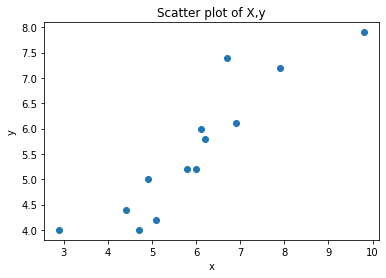

In [7]:
#colors = (0,0,0)

plt.scatter(X, y)
plt.title('Scatter plot of X,y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## LR Full Implementation

### Step1: Initialize parameters (theta_0 & theta_1) with random value or simply zero. Also choose the Learning rate. 

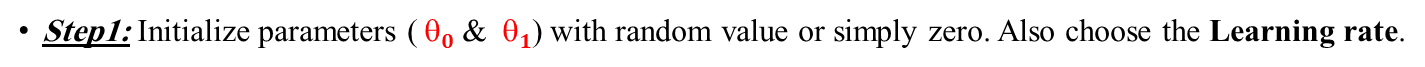

In [8]:
theta_0 = np.random.random()
theta_1 = np.random.random()
learning_rate = 0.001

### Step2: Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.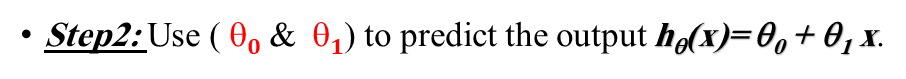
#### Note: you will need to iterate through all data points

In [9]:
def hypothesis(theta_0,theta_1,X):
    return theta_0 + theta_1*X


    

### Step3: Calculate Cost function 𝑱(theta_0,theta_1 ).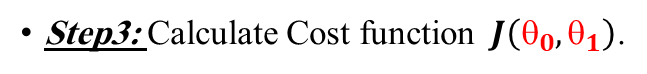
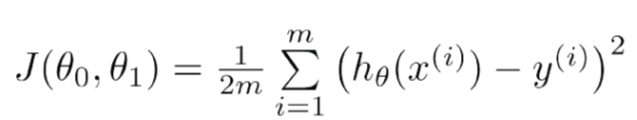

In [10]:
def cost_function(X,y,theta_0,theta_1):
    m = len(X)
    summation = 0
    for i in range (m):
        summation += ((theta_1 * X[i] + theta_0) - y[i])**2
    return summation /(2*m)

cost_output = cost_function(X,y,theta_0,theta_1)
print(cost_output)

2.273343557310958


### Step4: Calculate the gradient.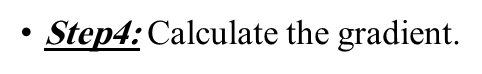
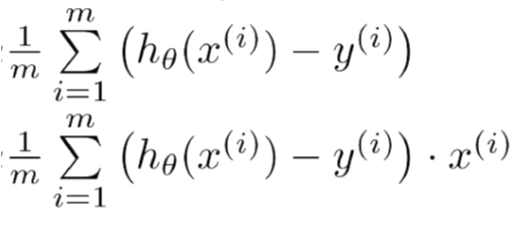

### Step5: Update the parameters (simultaneously).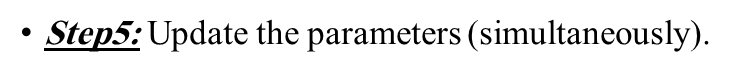
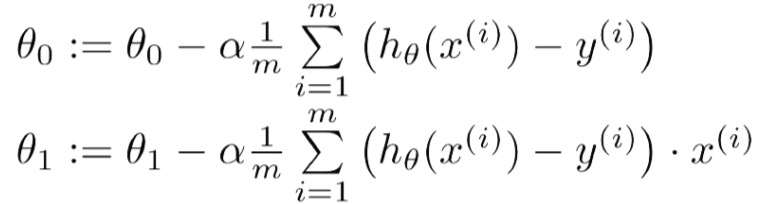

In [11]:
def gradient_descent(X,y,theta_0,theta_1,learning_rate):
    t0_deriv = 0
    t1_deriv = 0
    m = len(X)
    
    for i in range (m):
        t0_deriv = t0_deriv + (theta_1 * X[i] + theta_0) - y[i]
        t1_deriv = t1_deriv + ((theta_1 * X[i] + theta_0) - y[i])* X[i]
        
    theta_0 = theta_0 - (1/m) * learning_rate * t0_deriv
    theta_1 = theta_1 - (1/m) * learning_rate * t1_deriv
    
    return theta_0,theta_1

gradient_output = gradient_descent(X,y,theta_0,theta_1,learning_rate)
print(gradient_output)

(0.15973776173209567, 0.5766439835799917)


### Step6: Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.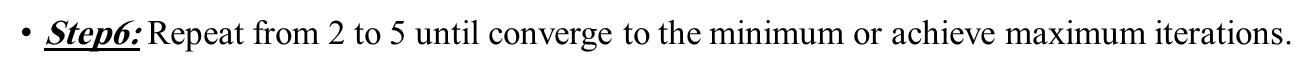

In [12]:
def training(X, y, theta_0, theta_1, learning_rate, iters):
    cost_history = [0]
    t0_history = [0]
    t1_history = [0]
    
    for i in range(iters):
        theta_0,theta_1 = gradient_descent(X, y, theta_0, theta_1, learning_rate)
        t0_history.append(theta_0)
        t1_history.append(theta_1)
        cost = cost_function(X, y, theta_0, theta_1)
        cost_history.append(cost)
        print("iter={}, theta_0={}, theta_1={}, cost= {}".format(i, theta_0, theta_1, cost))
    return t0_history, t1_history, cost_history

training_output = training(X, y, theta_0, theta_1, learning_rate, 1000)


iter=0, theta_0=0.15973776173209567, theta_1=0.5766439835799917, cost= 2.114083172238859
iter=1, theta_0=0.16171400514218698, theta_1=0.5887302667618752, cost= 1.9670309536490898
iter=2, theta_0=0.16361631243814403, theta_1=0.6003435339376532, cost= 1.8312510363320733
iter=3, theta_0=0.16544757382061306, theta_1=0.6115022770578832, cost= 1.7058792975274746
iter=4, theta_0=0.16721056650181082, theta_1=0.622224265155578, cost= 1.5901178572229975
iter=5, theta_0=0.1689079591226528, theta_1=0.6325265726076795, cost= 1.4832300000545176
iter=6, theta_0=0.1705423159972, theta_1=0.6424256062916882, cost= 1.3845354864880615
iter=7, theta_0=0.17211610119117474, theta_1=0.6519371316806424, cost= 1.2934062234416603
iter=8, theta_0=0.1736316824410325, theta_1=0.6610762979179492, cost= 1.2092622667928206
iter=9, theta_0=0.17509133491982298, theta_1=0.6698576619119493, cost= 1.1315681303295946
iter=10, theta_0=0.17649724485582996, theta_1=0.6782952114885377, cost= 1.0598293776536
iter=11, theta_0=0.1

In [13]:
print(training_output[0][-1])

0.2902834819141325


#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x

In [14]:
last_theta_0 = training_output[0][-1]
last_theta_1 = training_output[1][-1]


In [15]:
y_predicted = hypothesis(last_theta_0,last_theta_1,X)
print(y_predicted)

[2.82286438 6.1414183  4.56947184 7.18938303 8.8486602  6.3160793
 5.61743615 5.70476644 5.53010586 4.74413242 4.39481084 4.13281997
 5.35544528]


#### Plot  LR equation output (fitted line) with the original data (scatter plot of X,y)

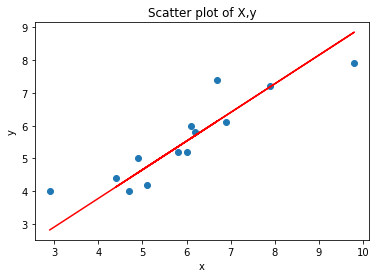

In [16]:
plt.scatter(X, y)
plt.plot(X, y_predicted, c='red')
plt.title('Scatter plot of X,y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


#### Use R2 score to evaluate LR equation output
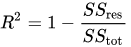
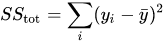
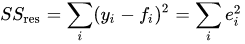
https://en.wikipedia.org/wiki/Coefficient_of_determination

In [17]:
from sklearn.metrics import r2_score 

R_square = r2_score(y, y_predicted) 
print('Coefficient of Determination', R_square) 

Coefficient of Determination 0.762940869735325


## GD vectorize Implementation
### Implement GD without iterate through data points i.e. use vector operations

In [18]:
training_output = training(X, y, theta_0, theta_1, learning_rate, 1000)
last_theta_0 = training_output[0][-1]
last_theta_1 = training_output[1][-1]


iter=0, theta_0=0.15973776173209567, theta_1=0.5766439835799917, cost= 2.114083172238859
iter=1, theta_0=0.16171400514218698, theta_1=0.5887302667618752, cost= 1.9670309536490898
iter=2, theta_0=0.16361631243814403, theta_1=0.6003435339376532, cost= 1.8312510363320733
iter=3, theta_0=0.16544757382061306, theta_1=0.6115022770578832, cost= 1.7058792975274746
iter=4, theta_0=0.16721056650181082, theta_1=0.622224265155578, cost= 1.5901178572229975
iter=5, theta_0=0.1689079591226528, theta_1=0.6325265726076795, cost= 1.4832300000545176
iter=6, theta_0=0.1705423159972, theta_1=0.6424256062916882, cost= 1.3845354864880615
iter=7, theta_0=0.17211610119117474, theta_1=0.6519371316806424, cost= 1.2934062234416603
iter=8, theta_0=0.1736316824410325, theta_1=0.6610762979179492, cost= 1.2092622667928206
iter=9, theta_0=0.17509133491982298, theta_1=0.6698576619119493, cost= 1.1315681303295946
iter=10, theta_0=0.17649724485582996, theta_1=0.6782952114885377, cost= 1.0598293776536
iter=11, theta_0=0.1

In [19]:
y_predicted_vectorized = hypothesis(last_theta_0,last_theta_1,X)
print(y_predicted_vectorized)

[2.82286438 6.1414183  4.56947184 7.18938303 8.8486602  6.3160793
 5.61743615 5.70476644 5.53010586 4.74413242 4.39481084 4.13281997
 5.35544528]


#### Plot the output and calculate R2 score
##### Make sure that you obtained the same results

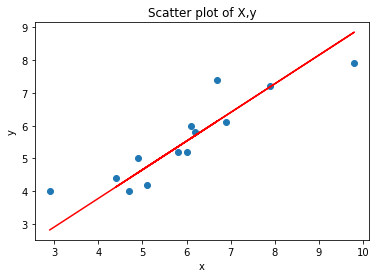

In [20]:
plt.scatter(X, y)
plt.plot(X, y_predicted_vectorized, c='red')
plt.title('Scatter plot of X,y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [21]:
from sklearn.metrics import r2_score 

R_square = r2_score(y, y_predicted_vectorized) 
print('Coefficient of Determination', R_square) 

Coefficient of Determination 0.762940869735325


## Plot loss function
### Repeat your last vectorized implementaion version and save loss for each iteration (epoch)

In [22]:
cost = training_output[2]
print(cost)

[0, 2.114083172238859, 1.9670309536490898, 1.8312510363320733, 1.7058792975274746, 1.5901178572229975, 1.4832300000545176, 1.3845354864880615, 1.2934062234416603, 1.2092622667928206, 1.1315681303295946, 1.0598293776536, 0.9935894753442006, 0.9324268873558279, 0.8759523921557713, 0.8238066055273804, 0.7756576932725915, 0.7311992592562802, 0.6901483953509336, 0.6522438808705249, 0.6172445200339077, 0.5849276068765247, 0.5550875078403884, 0.5275343530212273, 0.50209282774326, 0.47860105677058623, 0.4569095740537658, 0.43688037145454844, 0.41838602039437234, 0.4013088608363704, 0.38554025243917067, 0.3709798831164611, 0.3575351306016587, 0.3451204729543612, 0.3336569442567614, 0.32307163203580314, 0.3132972132124311, 0.3042715256244867, 0.29593717239620926, 0.2882411566363603, 0.28113454414000516, 0.2745721519472272, 0.2685122607766032, 0.26291634950322706, 0.25774884999137443, 0.252976920721436, 0.24857023777037474, 0.2445008018154023, 0.2407427599325547, 0.23727224105599792, 0.2340672040

### Plot loss vs. iterations

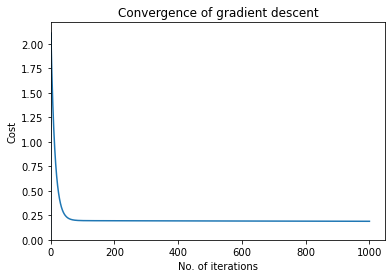

In [23]:
#Plot the cost function
plt.title('Convergence of gradient descent')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(cost)
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

## Multivariate LR

#### Read MultipleLR csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [24]:
MultipleLR = np.genfromtxt('MultipleLR.csv', delimiter=',')


In [25]:
print(MultipleLR)

[[ 73.  80.  75. 152.]
 [ 93.  88.  93. 185.]
 [ 89.  91.  90. 180.]
 [ 96.  98. 100. 196.]
 [ 73.  66.  70. 142.]
 [ 53.  46.  55. 101.]
 [ 69.  74.  77. 149.]
 [ 47.  56.  60. 115.]
 [ 87.  79.  90. 175.]
 [ 79.  70.  88. 164.]
 [ 69.  70.  73. 141.]
 [ 70.  65.  74. 141.]
 [ 93.  95.  91. 184.]
 [ 79.  80.  73. 152.]
 [ 70.  73.  78. 148.]
 [ 93.  89.  96. 192.]
 [ 78.  75.  68. 147.]
 [ 81.  90.  93. 183.]
 [ 88.  92.  86. 177.]
 [ 78.  83.  77. 159.]
 [ 82.  86.  90. 177.]
 [ 86.  82.  89. 175.]
 [ 78.  83.  85. 175.]
 [ 76.  83.  71. 149.]
 [ 96.  93.  95. 192.]]


In [26]:
y =  MultipleLR[:, 3]
maxy = np.max(y)
miny = np.min(y)
y_norm = y.copy()
y_norm = (y-miny)/(maxy - miny)
print(y)

m = len(y)


X = MultipleLR[:, :3]
ones = [1] * len(y)
X = np.insert(X, 0, ones, axis=1)
X_norm = X.copy()
minx = np.min(X[:,1:])
maxx = np.max(X[:,1:])
X_norm[:,1:] = (X[:,1:]-minx)/(maxx-minx)

print(X)
X_norm.shape

[152. 185. 180. 196. 142. 101. 149. 115. 175. 164. 141. 141. 184. 152.
 148. 192. 147. 183. 177. 159. 177. 175. 175. 149. 192.]
[[  1.  73.  80.  75.]
 [  1.  93.  88.  93.]
 [  1.  89.  91.  90.]
 [  1.  96.  98. 100.]
 [  1.  73.  66.  70.]
 [  1.  53.  46.  55.]
 [  1.  69.  74.  77.]
 [  1.  47.  56.  60.]
 [  1.  87.  79.  90.]
 [  1.  79.  70.  88.]
 [  1.  69.  70.  73.]
 [  1.  70.  65.  74.]
 [  1.  93.  95.  91.]
 [  1.  79.  80.  73.]
 [  1.  70.  73.  78.]
 [  1.  93.  89.  96.]
 [  1.  78.  75.  68.]
 [  1.  81.  90.  93.]
 [  1.  88.  92.  86.]
 [  1.  78.  83.  77.]
 [  1.  82.  86.  90.]
 [  1.  86.  82.  89.]
 [  1.  78.  83.  85.]
 [  1.  76.  83.  71.]
 [  1.  96.  93.  95.]]


(25, 4)

### Repeat your implementation but for more than one variable

In [27]:
# #Step-1
# theta_0 = np.random.random()
# theta_1 = np.random.random()
# theta_2 = np.random.random()
# theta_3 = np.random.random()




# Initial estimate of parameters
theta = np.zeros((X.shape[1],1))+0.4
print(theta)
#theta0 = np.array([[0],[0.5],[2],[0.5]])
learning_rate = 0.001

ypred = X_norm.dot(theta)
theta.shape
# sortidx = np.argsort(y_norm[:,0]) # sort the values for better visualization
# plt.plot(y_norm[sortidx,0],'o')
# plt.plot(ypred[sortidx,0],'--')

[[0.4]
 [0.4]
 [0.4]
 [0.4]]


(4, 1)

In [28]:
# #Step-2
# def hypothesis(theta_0,theta_1,theta_2,theta_3,X):
#     return theta_0*X[:,0] + theta_1*X[:,1] + theta_2*X[:,2] + theta_3*X[:,3]


In [29]:
def hypothesis(theta,X):
    X_norm = (X-minx)/(maxx-minx)
    y_predecited_norm = X_norm.dot(theta)
    return y_predecited_norm * (maxy - miny) + miny


In [30]:
# def cost_function(X,y,theta_0,theta_1,theta_2,theta_3):
#     m = len(X)
#     summation = 0
#     for i in range (m):
#         summation += ((theta_0*X[:,0] + theta_1*X[:,1] + theta_2*X[:,2] + theta_3*X[:,3]) - y[i])**2
#     return summation /(2*m)

In [31]:
def cost_function(theta):
    return np.sum((X_norm.dot(theta)-y_norm)**2,axis=0)[0]

In [32]:
# def gradient_descent(X,y,theta_0,theta_1,theta_2,theta_3,learning_rate):
#     t0_deriv = 0
#     t1_deriv = 0
#     t2_deriv = 0
#     t3_deriv = 0

#     m = len(X)
    
#     for i in range (m):
#         t0_deriv = t0_deriv + (theta_1 * X[i] + theta_0) - y[i]
#         t1_deriv = t1_deriv + ((theta_1 * X[i] + theta_0) - y[i])* X[i]
#         t2_deriv = t2_deriv + ((theta_1 * X[i] + theta_0) - y[i])* X[i]
#         t3_deriv = t3_deriv + ((theta_1 * X[i] + theta_0) - y[i])* X[i]

        
#     theta_0 = theta_0 - (1/m) * learning_rate * t0_deriv
#     theta_1 = theta_1 - (1/m) * learning_rate * t1_deriv
#     theta_2 = theta_2 - (1/m) * learning_rate * t2_deriv
#     theta_3 = theta_3 - (1/m) * learning_rate * t3_deriv

    
#     return theta_0,theta_1,theta_2,theta_3

# gradient_output = gradient_descent(X,y,theta_0,theta_1,theta_2,theta_3,learning_rate)
# print(gradient_output)

In [33]:
def gradient_descent(theta):
    m = np.sum((X_norm.dot(theta)-y_norm).dot(X_norm))
    return 1/m*np.sum((X_norm.dot(theta)-y_norm).dot(X_norm),axis=0).reshape(-1,1)

In [34]:
gradient_descent(theta)

array([[0.38688661],
       [0.19729738],
       [0.20043473],
       [0.21538128]])

In [35]:
# def training(X, y, theta_0, theta_1,theta_2,theta_3, learning_rate, iters):
#     cost_history = [0]
#     t0_history = [0]
#     t1_history = [0]
#     t2_history = [0]
#     t3_history = [0]

    
#     for i in range(iters):
#         theta_0,theta_1,theta_2,theta_3 = gradient_descent(X, y, theta_0, theta_1,theta_2,theta_3, learning_rate)
#         t0_history.append(theta_0)
#         t1_history.append(theta_1)
#         t2_history.append(theta_2)
#         t3_history.append(theta_3)

#         cost = cost_function(X, y, theta_0, theta_1,theta_2,theta_3)
#         cost_history.append(cost)
#         print("iter={}, theta_0={}, theta_1={}, cost= {}".format(i, theta_0, theta_1, cost))
#     return t0_history, t1_history,t2_history,t3_history, cost_history

# training_output = training(X, y, theta_0, theta_1,theta_2,theta_3, learning_rate, 1000)


In [36]:
def training(theta,learning_rate ,iters):
    
    theta_history = [theta]
    cost_history = [cost_function(theta)]
    
    thetanew = theta*10000
    print(f'epoch \t Cost(J) \t')
    for i in range(iters):
        if i%100 == 0:
            print(f'{i:5d}\t{cost_history[-1]:7.4f}\t')
       
        thetanew = theta - learning_rate * gradient_descent(theta)
        theta_history.append(thetanew)
        cost_history.append(cost_function(theta))
        
#         if np.sum((thetanew - theta)**2) < TOL:
#             print('Convergence achieved.')
#             break
        theta = thetanew

    return thetanew,theta_history,cost_history

epoch 	 Cost(J) 	
    0	11.1890	
  100	 8.8047	
  200	 6.6970	
  300	 4.8925	
  400	 3.3925	
  500	 2.1983	
  600	 1.3289	
  700	 0.8840	
  800	 0.7055	
  900	 0.8079	


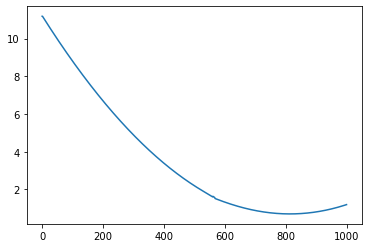

In [37]:
theta,theta_history,J_history = training(theta,0.001,1000)
plt.plot(J_history)


#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x1 + theta_2 * x2 + theta_3 * x3

In [38]:
y_predicted = hypothesis(theta,X)
print(y_predicted)

[[137.37063172]
 [154.46184862]
 [153.00581108]
 [161.88299598]
 [130.28740959]
 [109.6758276 ]
 [134.2371858 ]
 [112.91296708]
 [147.66088242]
 [140.43588419]
 [131.31306634]
 [130.14579679]
 [156.4278617 ]
 [138.99286069]
 [134.59350416]
 [155.89314426]
 [134.95062891]
 [150.5786531 ]
 [151.59909406]
 [141.14900071]
 [148.39174899]
 [148.06635801]
 [143.9500638 ]
 [138.27403848]
 [158.22784666]]


### Plot loss vs. iterations

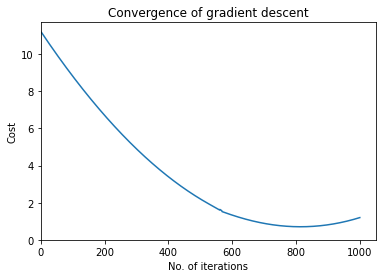

In [39]:
#Plot the cost function
plt.title('Convergence of gradient descent')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(J_history)
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

#### Use R2 score to evaluate LR equation output

In [40]:
from sklearn.metrics import r2_score 

R_square = r2_score(y, y_predicted) 
print('Coefficient of Determination', R_square) 

Coefficient of Determination 0.03964055268118838


# Bonus
## LR Using sklearn

### Single Variable

#### Build a LR model usin linearmodel.LinearRegression() from sklearn library

In [41]:
import numpy as np
from sklearn.linear_model import LinearRegression



In [42]:
X = regData[:, 0].reshape(-1, 1)
#print(X)

y =  regData[:, 1]

#### Train the model (fit the model to the training data)

In [43]:
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.8213156778363777

#### Predict y values using the trained model

In [44]:
y_predicted = reg.predict(X)
print(y_predicted)

[3.44824549 6.08745623 4.83730388 6.92089146 8.240497   6.22636227
 5.67073878 5.74019163 5.60128593 4.97620959 4.69839784 4.49003928
 5.46238022]


#### Plot model output (fitted line) with the original data (scatter plot of X,y)

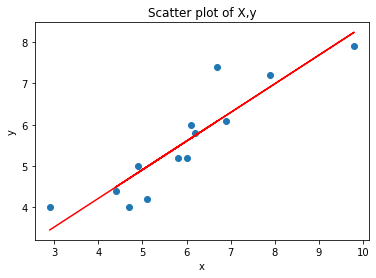

In [45]:
plt.scatter(X, y)
plt.plot(X, y_predicted, c='red')
plt.title('Scatter plot of X,y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


#### Use R2 score to evaluate model output

In [46]:
from sklearn.metrics import r2_score 

R_square = r2_score(y, y_predicted) 
print('Coefficient of Determination', R_square) 

Coefficient of Determination 0.8213156778363777


### Repeat for Mulivariate

In [47]:
y =  MultipleLR[:, 3]
print(y)

X = MultipleLR[:, :3]
#ones = [1] * len(y)
#X = np.insert(X, 0, ones, axis=1)
print(X)


[152. 185. 180. 196. 142. 101. 149. 115. 175. 164. 141. 141. 184. 152.
 148. 192. 147. 183. 177. 159. 177. 175. 175. 149. 192.]
[[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]
 [ 53.  46.  55.]
 [ 69.  74.  77.]
 [ 47.  56.  60.]
 [ 87.  79.  90.]
 [ 79.  70.  88.]
 [ 69.  70.  73.]
 [ 70.  65.  74.]
 [ 93.  95.  91.]
 [ 79.  80.  73.]
 [ 70.  73.  78.]
 [ 93.  89.  96.]
 [ 78.  75.  68.]
 [ 81.  90.  93.]
 [ 88.  92.  86.]
 [ 78.  83.  77.]
 [ 82.  86.  90.]
 [ 86.  82.  89.]
 [ 78.  83.  85.]
 [ 76.  83.  71.]
 [ 96.  93.  95.]]


In [48]:
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.98966157894484

In [49]:
y_predicted = reg.predict(X)
print(y_predicted)

[152.60720439 185.08011472 181.78158547 199.74522647 139.1747207
 103.69391793 150.2632274  112.82069728 174.55948394 164.49442094
 143.42337551 142.23416416 186.54285759 152.40794527 151.24409108
 189.12496613 143.50219218 181.89389361 177.29838914 158.34934019
 176.57742415 174.66365778 167.68889392 150.63279846 191.1954116 ]


In [50]:
from sklearn.metrics import r2_score 

R_square = r2_score(y, y_predicted) 
print('Coefficient of Determination', R_square) 

Coefficient of Determination 0.98966157894484
